In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/')
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/rl2')
from baseline_classifiers import LogisticRegressionModel, SVMModel, benchmark_baseline_models_2d, benchmark_baseline_models_regex_parsed
import numpy as np

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
COLORS = {'compositional':'#117733', 
          'noncompositional':'#96CAA7',
          'lr':'#88CCEE',#882255
          'svm':'#CC6677',
          'optimal': '#D6BF4D',
          'mean_tracker':'#882255', #332288
          'mean_tracker_compositional':'#882255', #AA4499',
          'rbf_nocontext_nomemory':'#44AA99', 
          'simple_grammar_constrained':'#44AA99',
          'simple_grammar_constrained_noncompositonal':'#EF9EBB',
          'rl2':'#E2C294', #'#0571D0', 
          'metal':'#DA9138', #"#D55E00", 
          }
FONTSIZE=20

## stats over many tasks



#### gpt-3

In [3]:
NUM_DATA=100

#### gpt-4

In [4]:
llama_gen_tasks = pd.read_csv('../data/gpt4_generated_tasks_paramsNA_dim3_data100_tasks200.csv')#temp/llama_generated_tasks_params65B_dim3_data8_tasks500_run0_procid0.csv')
#llama_gen_tasks = llama_gen_tasks.query('target == "A" or target == "B"')
#llama_gen_tasks = llama_gen_tasks[llama_gen_tasks.trial_id<NUM_DATA]
inputs = np.stack([eval(val)  for val in llama_gen_tasks.input.values])
targets = np.stack([val  for val in llama_gen_tasks.target.values])
num_tasks = llama_gen_tasks.task_id.max()+1
expected_number_points = np.array([llama_gen_tasks[llama_gen_tasks.task_id==ii].trial_id.max()+1 for ii in np.arange(num_tasks)]).mean()
llama=False
model='gpt4'

#### llama

#### random

In [5]:
llama_gen_tasks

,Unnamed: 0,Unnamed: 0.1,input,target,trial_id,task_id
0,0,0,"[0.12, 0.35, 0.67]",A,0,0.0
1,1,1,"[0.54, 0.33, 0.14]",B,1,0.0
2,2,2,"[0.8, 0.17, 0.32]",B,2,0.0
3,3,3,"[0.45, 0.96, 0.3]",A,3,0.0
4,4,4,"[0.23, 0.62, 0.71]",A,4,0.0
...,...,...,...,...,...,...
10603,10603,5246,"[0.63, 0.34, 0.87]",B,90,110.0
10604,10604,5247,"[0.98, 0.6, 0.49]",B,91,110.0
10605,10605,5248,"[0.75, 0.49, 0.28]",B,92,110.0
10606,10606,5249,"[0.69, 0.86, 0.1]",A,93,110.0


## Stats

### score on n+1 point given fits on n point for gpt-3 dataset

In [6]:
expected_number_points = np.array([llama_gen_tasks[llama_gen_tasks.task_id==ii].trial_id.max()+1 for ii in np.arange(num_tasks)]).mean()
print(expected_number_points)

95.56756756756756


In [7]:
np.array([llama_gen_tasks[llama_gen_tasks.task_id==ii].trial_id.max()+1 for ii in np.arange(num_tasks)])

array([106,  97, 100,  89,  91, 100,  70,  98, 103, 111,  62,  77,  96,
        94, 108, 102,  73,  98,  94, 108,  73, 101, 108,  97, 102, 100,
       108, 100, 104,  96,  80,  97,  74,  95, 109, 106,  98, 108,  79,
       104,  73, 110,  98, 106, 104,  98,  97,  93,  80, 111,  82, 111,
        96,  85,  99,  98,  96,  80,  93,  97, 106, 110,  97,  94, 110,
        98,  86,  98, 107, 107,  90,  80, 110,  92,  96, 100, 104,  71,
        96,  87,  82,  98, 111,  98,  95,  96,  82,  99,  68,  89,  76,
        60,  94,  97, 109, 102,  81, 103, 105,  97,  85, 110, 102, 108,
        98, 104, 100, 100,  98, 104,  95])

In [8]:
from utils import evaluate_data_against_baselines
import torch

In [9]:
fit_upto_trial = 50
plot_last_trials = 40

accuracy_lm, accuracy_svm = evaluate_data_against_baselines(llama_gen_tasks, fit_upto_trial)
accuracy_lm = [acc[-plot_last_trials:] for acc in accuracy_lm if len(acc)>=plot_last_trials]
accuracy_svm = [acc[-plot_last_trials:] for acc in accuracy_svm if len(acc)>=plot_last_trials]

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:294: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /home/abuild/rpmbuild/BUILD/pytorch-1.13.0/torch/csrc/utils/tensor_new.cpp:230.)
  baseline_model_choices.append(torch.tensor([lr_model_choice, svm_model_choice]))


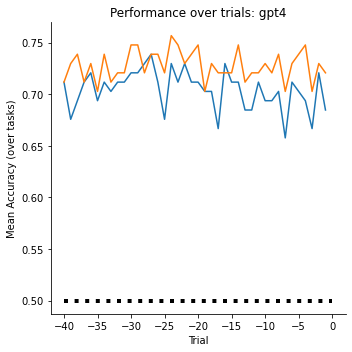

In [10]:
f, ax = plt.subplots(1, 1, figsize=(5,5))   

ax.plot(np.arange(-plot_last_trials, 0), torch.stack(accuracy_lm).sum(0)/(llama_gen_tasks.task_id.max()+1))
ax.plot(np.arange(-plot_last_trials, 0), torch.stack(accuracy_svm).sum(0)/(llama_gen_tasks.task_id.max()+1))
#ax.set_ylim([0., .8])
ax.hlines(0.5, -plot_last_trials, 0, color='k', linestyles='dotted', lw=4)#, label='Random')
#ax.plot(llama_distances, label = 'llama')
ax.set_xlabel('Trial')
ax.set_ylabel('Mean Accuracy (over tasks)')
ax.set_title(f'Performance over trials: {model}')
#ax.legend()
sns.despine()
f.tight_layout()
plt.show()

### temporal auto-corrleation

In [11]:
from utils import l2_distance_trials_all

have to run for all three types of data

In [12]:
for rr in [True, False]:
    dds = []
    assert random == False if llama else 'no need of random for llama'
    shifts = 4 if llama else 80
    within_targets = False
    for shift in range(0, shifts):
        distances = l2_distance_trials_all(llama_gen_tasks, target='A', shift=shift, within_targets=within_targets, llama=llama, random=rr)
        dds.append(distances)
    nan_distances = np.nanmean(np.nanmean(np.stack(dds),1),1)

    if llama:
        llama_distances = nan_distances
    elif rr:
        random_distances = nan_distances 
    elif model=='gpt3':
        gpt3_distances = nan_distances
    elif model=='gpt4':
        gpt4_distances = nan_distances

/tmp/ipykernel_86495/6313762.py:9: RuntimeWarning: Mean of empty slice
  nan_distances = np.nanmean(np.nanmean(np.stack(dds),1),1)


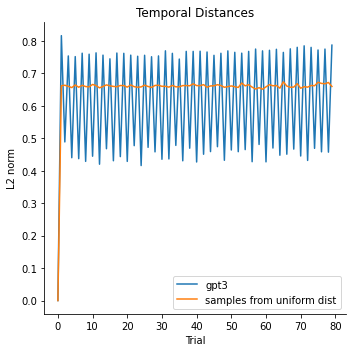

In [15]:
f, ax = plt.subplots(1, 1, figsize=(5,5)) 

ax.plot(gpt3_distances if model=='gpt3' else gpt4_distances, label='gpt3')
ax.plot(random_distances, label='samples from uniform dist')
#ax.plot(llama_distances, label = 'llama')
ax.set_xlabel('Trial')
ax.set_ylabel('L2 norm')
ax.set_title(f'Temporal Distances')
ax.legend()
sns.despine()
f.tight_layout()
plt.show()

### same category vs distance

In [16]:
from utils import probability_same_target_vs_distance

In [79]:
distances, probabilities = probability_same_target_vs_distance(llama_gen_tasks, random=False)

/tmp/ipykernel_86495/1677442402.py:1: RuntimeWarning: Mean of empty slice
  dists, probs = np.nanmean(distances,0), np.nanmean(probabilities, 0)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


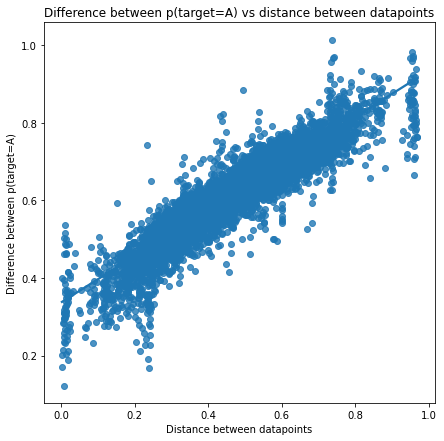

In [80]:
dists, probs = np.nanmean(distances,0), np.nanmean(probabilities, 0)
# plot probability vs distance
f, ax = plt.subplots(1, 1, figsize=(7,7))
sns.regplot(probs, dists, ax=ax, ci=95)
ax.set_title(f'Difference between p(target=A) vs distance between datapoints')
ax.set_xlabel('Distance between datapoints')
ax.set_ylabel('Difference between p(target=A)')
plt.show()

### autocorrelation of features

In [59]:
def plot_autocorr_features(data):
    '''
    Autocorrelation between features for each task
    Args:
        data: pandas dataframe with columns ['task_id', 'trial_id', 'input', 'target']
    Returns:
        None
    '''
    tasks = data.task_id.unique()
    # store the autocorrelations for each task
    autocorrs = []

    # extract the autocorrelations for each task
    for task in tasks:
        # get the inputs for this task which is numpy array of dim (num_trials, 3)
        inputs = np.stack([eval(val) for val in data[data.task_id==task].input.values])
        # get the targets for this task which is numpy array of dim (num_trials, 1)
        targets = np.stack([val for val in data[data.task_id==task].target.values])
        
        # get the autocorrelations between input dimensions over trials
        autocorr = np.array([np.corrcoef(inputs[:,ii], inputs[:,jj])[0,1] for ii in range(inputs.shape[1]) for jj in range(inputs.shape[1])])
        # reshape the autocorrelations to be of dim (num_trials, num_input_dims, num_input_dims)
        autocorr = autocorr.reshape((inputs.shape[1], inputs.shape[1]))
        
        # store the autocorrelations for this task
        autocorrs.append(autocorr)
    
    # plot the mean autocorrelations for each task
    f, ax = plt.subplots(1, 1, figsize=(7,7))
    ax.imshow(np.stack(autocorrs).mean(axis=0), cmap='RdBu_r', vmin=-1, vmax=1)
    ax.set_xticks(np.arange(0,3))
    ax.set_yticks(np.arange(0,3))
    ax.set_xticklabels(['x1', 'x2', 'x3'])
    ax.set_yticklabels(['x1', 'x2', 'x3'])
    ax.set_title(f'Mean autocorrleation across tasks {task+1}')
    plt.show()
    return np.stack(autocorrs)

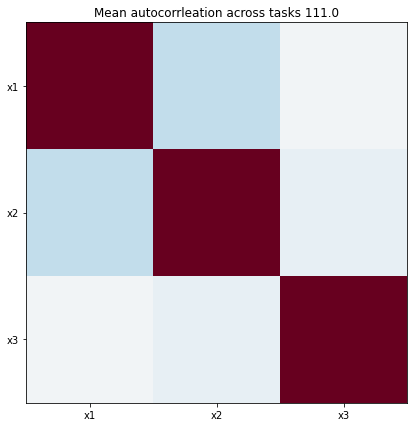

In [60]:
#from plots import plot_autocorr_features
auto_corrs = plot_autocorr_features(llama_gen_tasks)

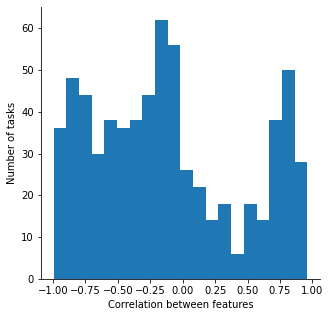

In [58]:
corrs = np.stack([arr[~np.eye(arr.shape[0], dtype=bool)].reshape(arr.shape[0], -1) for arr in auto_corrs]).reshape(-1)
f, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.hist(corrs, bins=20)
ax.set_xlabel('Correlation between features')
ax.set_ylabel('Number of tasks')
sns.despine()
plt.show()

### evolution of correlation between features over time

In [63]:
data = llama_gen_tasks
features = []
input_length=120
for task in data.task_id.unique():
    inputs = np.stack([eval(val) for val in data[data.task_id==task].input.values])
    inputs = np.pad(inputs, ((0, input_length-inputs.shape[0]), (0,0)), 'constant', constant_values=np.nan)
    features.append(inputs)

In [64]:
x12 = [np.corrcoef(np.stack(features)[:, time].squeeze().T)[0,1] for time in range(100)]
x13 =  [np.corrcoef(np.stack(features)[:, time].squeeze().T)[0,2] for time in range(100)]
x23 =  [np.corrcoef(np.stack(features)[:, time].squeeze().T)[1,2] for time in range(100)]

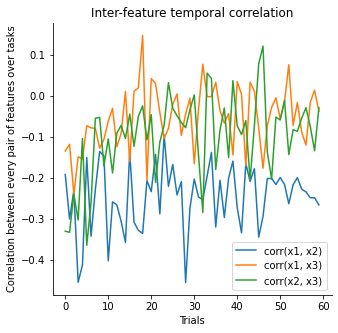

In [72]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(np.stack(x12), label='corr(x1, x2)')
ax.plot(np.stack(x13), label='corr(x1, x3)')
ax.plot(np.stack(x23), label='corr(x2, x3)')
ax.set_title(f'Inter-feature temporal correlation')
ax.set_xlabel('Trials')
ax.set_ylabel('Correlation between every pair of features over tasks')
sns.despine()
plt.legend()
plt.show()

### correlation between a given feature and every other feature

In [15]:
data = llama_gen_tasks
features = []
input_length=120
for task in data.task_id.unique():
    inputs = np.stack([eval(val) for val in data[data.task_id==task].input.values])
    inputs = np.pad(inputs, ((0, input_length-inputs.shape[0]), (0,0)), 'constant', constant_values=np.nan)
    features.append(inputs)
features = np.stack(features)

In [16]:
corr = np.array([np.corrcoef(features[:,ii,:].flatten(), features[:,jj,:].flatten())[0,1] for ii in range(features.shape[1]) for jj in range(features.shape[1])])
#print(corr.shape)
corr = corr.reshape((features.shape[1], features.shape[1]))

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
for which_feature in range(3):
    corr = np.array([np.corrcoef(features[:, ii, which_feature].flatten(), features[:, 0, which_feature].flatten())[0,1] for ii in range(features.shape[1])]) #for jj in range(features.shape[1])])  
    ax.plot(corr, label=f'corr($x_t$({which_feature+1}), $x_0$({which_feature+1}))')
    # ax.plot(np.stack(x13), label='corr(x1, x2)')
    # ax.plot(np.stack(x23), label='corr(x2, x3)')
ax.set_title(f'Temporal correlation')
ax.set_xlabel('Trials')
ax.set_ylabel('Correlation between a given feature  over tasks')
sns.despine()
plt.legend()
plt.show()

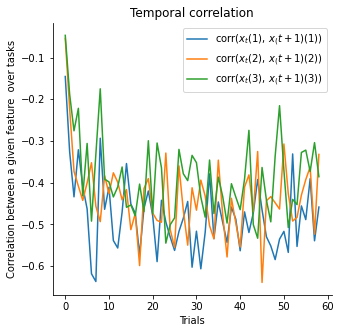

In [22]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
for which_feature in range(3):
    corr = np.array([np.corrcoef(features[:, ii, which_feature].flatten(), features[:, ii+1, which_feature].flatten())[0,1] for ii in range(features.shape[1]-1)]) #for jj in range(features.shape[1])])  
    ax.plot(corr, label=f'corr($x_t$({which_feature+1}), $x_(t+1)$({which_feature+1}))')
ax.set_title(f'Temporal correlation')
ax.set_xlabel('Trials')
ax.set_ylabel('Correlation between a given feature  over tasks')
sns.despine()
plt.legend()
plt.show()

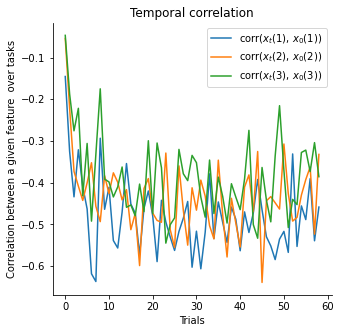

In [19]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
for which_feature in range(3):
    corr = np.array([np.corrcoef(features[:, ii, which_feature].flatten(), features[:, ii+1, which_feature].flatten())[0,1] for ii in range(features.shape[1]-1)]) #for jj in range(features.shape[1])])  
    ax.plot(corr, label=f'corr($x_t$({which_feature+1}), $x_0$({which_feature+1}))')
    # ax.plot(np.stack(x13), label='corr(x1, x2)')
    # ax.plot(np.stack(x23), label='corr(x2, x3)')
ax.set_title(f'Temporal correlation')
ax.set_xlabel('Trials')
ax.set_ylabel('Correlation between a given feature  over tasks')
sns.despine()
plt.legend()
plt.show()

### step wise autocorrelations

In [89]:
from utils import l2_distance_trials

In [91]:
distances = l2_distance_trials(llama_gen_tasks, within_targets=False)

### per-task binning

In [27]:
def find_counts(inputs, dim, xx_min, xx_max):
    return (inputs[:, dim]<xx_max)*(inputs[:, dim]>xx_min)

### label imbalance issue

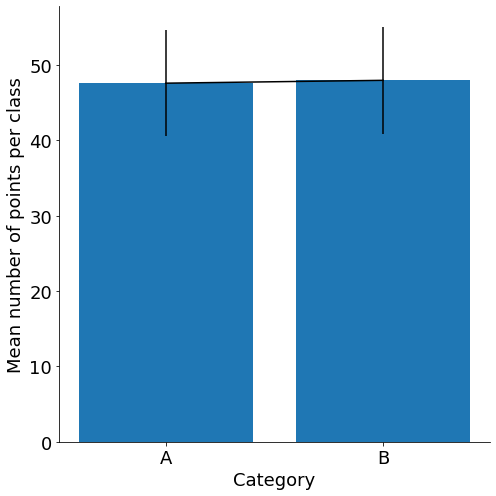

In [49]:
num_targets = np.stack([(llama_gen_tasks[llama_gen_tasks.task_id==task_id].target=='A').sum() for task_id in llama_gen_tasks.task_id.unique()])

f, ax = plt.subplots(1, 1, figsize=(7,7))

ax.bar(['A','B'], [num_targets.mean(), expected_number_points-num_targets.mean()])
ax.errorbar(['A','B'], [num_targets.mean(), expected_number_points-num_targets.mean()], yerr=[num_targets.std(), num_targets.std()], c='k')
#plt.legend(fontsize=FONTSIZE-5,  loc="upper center", bbox_to_anchor=(.45, 1.1), ncol=3, frameon=True)
ax.set_ylabel('Mean number of points per class', fontsize=FONTSIZE-2)
ax.set_xlabel('Category', fontsize=FONTSIZE-2) #$a_{name_trials}$
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

In [50]:
### choose inputs within the range 0 to 1
min_value = 0.
max_value = 1.
inputs_in_range = [(inputs[ii]>min_value).all() * (inputs[ii]<max_value).all() for ii in range(len(inputs))]
inputs = inputs[inputs_in_range]
targets = targets[inputs_in_range]

In [51]:
def find_counts(inputs, dim, xx_min, xx_max):
    return (inputs[:, dim]<xx_max)*(inputs[:, dim]>xx_min)

In [52]:
num_bins = 5
bins = np.linspace(0, 1, num_bins+1)[:-1]
bin_counts, target_counts = [], [] #np.zeros((len(bins)*3))
for ii in bins:
    x_min = ii 
    x_max = ii + 1/num_bins
    for jj in bins:
        y_min = jj
        y_max = jj + 1/num_bins
        for kk in bins:
            z_min = kk
            z_max = kk + 1/num_bins
            num_points = (find_counts(inputs, 0, x_min, x_max)*find_counts(inputs, 1, y_min, y_max)*find_counts(inputs, 2, z_min, z_max))
            bin_counts.append(num_points.sum())
            target_counts.append((targets[num_points]=='A').sum())

In [53]:
b_counts = np.stack(bin_counts)-np.stack(target_counts) 
a_counts = np.stack(target_counts) 

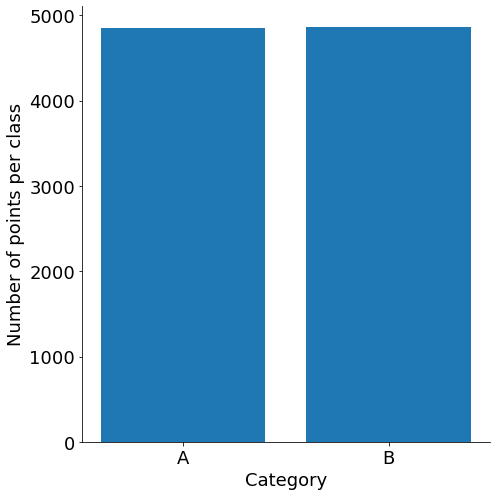

In [54]:
f, ax = plt.subplots(1, 1, figsize=(7,7))

ax.bar(['A','B'], [a_counts.sum(), b_counts.sum()])
#plt.legend(fontsize=FONTSIZE-5,  loc="upper center", bbox_to_anchor=(.45, 1.1), ncol=3, frameon=True)
ax.set_ylabel('Number of points per class', fontsize=FONTSIZE-2)
ax.set_xlabel('Category', fontsize=FONTSIZE-2) #$a_{name_trials}$
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

### binning points

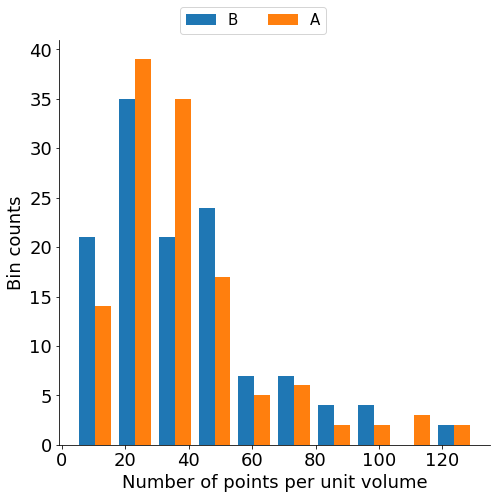

In [46]:
f, ax = plt.subplots(1, 1, figsize=(7,7))

ax.hist([b_counts, a_counts], label=['B', 'A'])
plt.legend(fontsize=FONTSIZE-5,  loc="upper center", bbox_to_anchor=(.45, 1.1), ncol=3, frameon=True)
ax.set_ylabel('Bin counts', fontsize=FONTSIZE-2)
ax.set_xlabel('Number of points per unit volume', fontsize=FONTSIZE-2) #$a_{name_trials}$
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

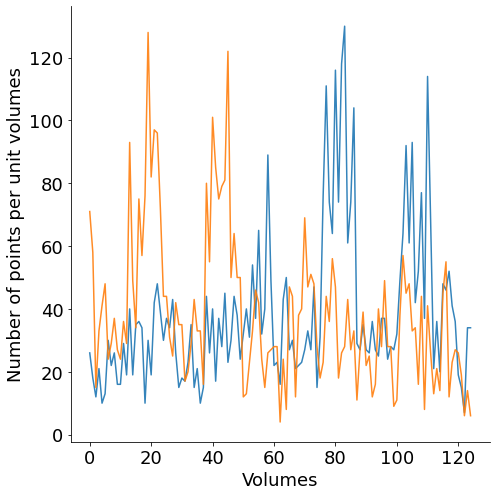

In [47]:
b_counts = np.stack(bin_counts)-np.stack(target_counts) 
a_counts = np.stack(target_counts) 
f, ax = plt.subplots(1, 1, figsize=(7,7))
ax.plot(np.arange(len(a_counts)), a_counts[::-1], alpha=0.9, label='A')
ax.plot(np.arange(len(b_counts)), b_counts[::-1], alpha=0.9, label='B')
ax.set_ylabel('Number of points per unit volumes', fontsize=FONTSIZE-2)
ax.set_xlabel('Volumes', fontsize=FONTSIZE-2) #$a_{name_trials}$
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()


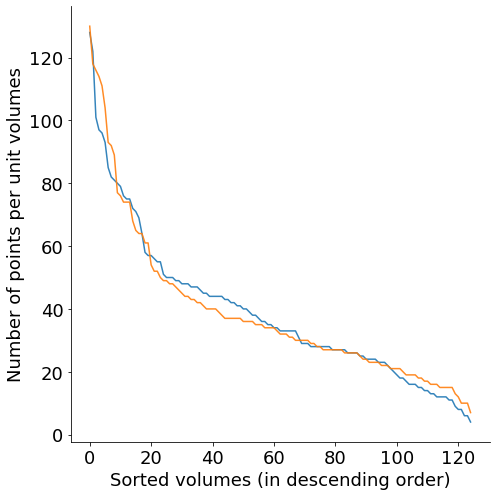

In [48]:
b_counts = np.stack(bin_counts)-np.stack(target_counts) 
a_counts = np.stack(target_counts) 
b_counts.sort()
a_counts.sort()

f, ax = plt.subplots(1, 1, figsize=(7,7))
ax.plot(np.arange(len(b_counts)), b_counts[::-1], alpha=0.9, label='B')
ax.plot(np.arange(len(a_counts)), a_counts[::-1], alpha=0.9, label='A')

ax.set_ylabel('Number of points per unit volumes', fontsize=FONTSIZE-2)
ax.set_xlabel('Sorted volumes (in descending order)', fontsize=FONTSIZE-2) #$a_{name_trials}$
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()


### scatters

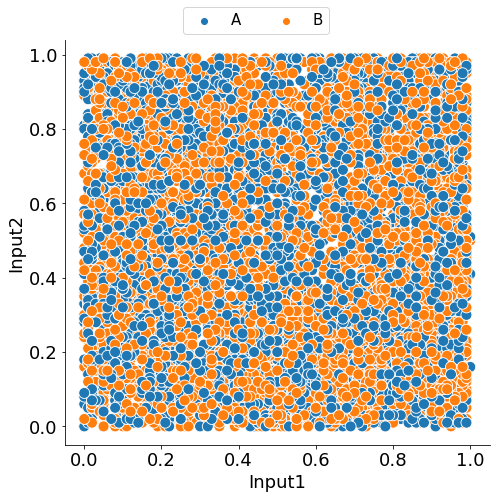

In [39]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
sns.scatterplot(x=inputs[:,0], y=inputs[:,1], hue=targets,s=120)

plt.legend(fontsize=FONTSIZE-5,  loc="upper center", bbox_to_anchor=(.45, 1.1), ncol=3, frameon=True)
#plt.legend(loc='lower left', fontsize=FONTSIZE, frameon=True)
ax.set_xlabel('Input1', fontsize=FONTSIZE-2)
ax.set_ylabel('Input2', fontsize=FONTSIZE-2) #$a_{name_trials}$
#plt.xlim([0, 1.])
#plt.ylim([0, 1.])
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

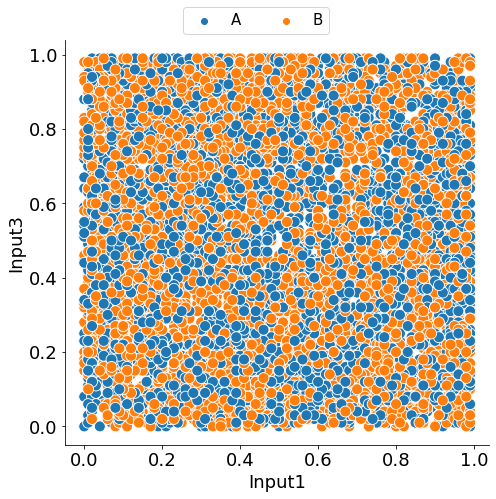

In [38]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
sns.scatterplot(x=inputs[:,1], y=inputs[:,2], hue=targets,s=120)

plt.legend(fontsize=FONTSIZE-5,  loc="upper center", bbox_to_anchor=(.45, 1.1), ncol=3, frameon=True)
#plt.legend(loc='lower left', fontsize=FONTSIZE, frameon=True)
ax.set_xlabel('Input1', fontsize=FONTSIZE-2)
ax.set_ylabel('Input3', fontsize=FONTSIZE-2) #$a_{name_trials}$
# plt.xlim([0, 1.])
# plt.ylim([0, 1.])
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

### classifiablity

In [37]:
from utils import return_baseline_performance

In [38]:
random=True
means, std_errors, performance = return_baseline_performance(llama_gen_tasks, random=random)

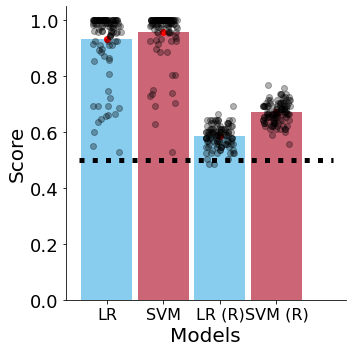

In [39]:
conditions =  ['LR', 'SVM', 'LR (R)', 'SVM (R)'] if random else ['LR', 'SVM']
colors =  [COLORS['lr'], COLORS['svm']] if random else [COLORS['lr'], COLORS['svm']]
FIGSIZE=(5,5)
f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
## bar plot
ax.bar(np.arange(0,len(means)), means, color=colors, label=conditions, width=.9)
ax.errorbar(np.arange(0,len(means)), means, yerr=std_errors, color='r', lw=3, fmt='o') #linestyle='solid')

## plot individual points
w = 0.5
ax.hlines(0.5, -0.5, len(means), color='k', linestyles='dotted', lw=5)#, label='Random')
for i in range(len(means)):
    # distribute scatter randomly across whole width of bar
    ax.scatter(i + np.random.random(performance.shape[0]) * w - w / 2, performance[:, i], color='k', alpha=.3, zorder=3)

## formatting    
# ax.set_ylim(ymin=0., ymax=1.)

plt.xticks(np.arange(0,len(means)))
plt.yticks(fontsize=FONTSIZE-2)
ax.set_xlabel('Models', fontsize=FONTSIZE)
ax.set_ylabel(f'Score', fontsize=FONTSIZE)#$a_{trials}$
ax.set_xticklabels(conditions, fontsize=FONTSIZE-4)#['', '']
sns.despine()
f.tight_layout()
plt.show()

### marcel's analysis

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import torch

df = llama_gen_tasks

# TODO Gini coefficient

all_corr = []
all_coef = []
all_bics_linear = []
all_bics_quadratic = []
for i in range(0, 128):
    df_task = df[df['task_id'] == i]
    if len(df_task) > 40: # arbitarz data size threshold
        print('here')
        y = df_task['target'].to_numpy()
        y = np.unique(y, return_inverse=True)[1]

        df_task['input'] = df_task['input'].apply(eval).apply(np.array)
        X = df_task["input"].to_numpy()
        X = np.stack(X)
        
        # correlations
        all_corr.append(np.corrcoef(X[:, 0], X[:, 1])[0, 1])
        all_corr.append(np.corrcoef(X[:, 0], X[:, 2])[0, 1])
        all_corr.append(np.corrcoef(X[:, 1], X[:, 2])[0, 1])


        if (y == 0).all() or (y == 1).all():
            pass
        else:
            X_linear = PolynomialFeatures(1).fit_transform(X)
            log_reg = sm.Logit(y, X_linear).fit(method='bfgs')

            # weights
            all_coef.append(log_reg.params[1])
            all_coef.append(log_reg.params[2])
            all_coef.append(log_reg.params[3])

            X_poly = PolynomialFeatures(2).fit_transform(X)
            log_reg_quadratic = sm.Logit(y, X_poly).fit(method='bfgs')

            # bics
            all_bics_linear.append(log_reg.bic)
            all_bics_quadratic.append(log_reg_quadratic.bic)

# compute posterior probabilities
logprobs = torch.from_numpy(-0.5 * np.stack((all_bics_linear, all_bics_quadratic), -1))
joint_logprob = logprobs + torch.log(torch.ones([]) /logprobs.shape[1])
marginal_logprob = torch.logsumexp(joint_logprob, dim=1, keepdim=True)
posterior_logprob = joint_logprob - marginal_logprob

here
Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
here
Optimization terminated successfully.
         Current function value: 0.635725
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.495207
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
here
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 21
         Function evaluations: 23
         Gradient evaluat

/tmp/ipykernel_86495/1886634203.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/tmp/ipykernel_86495/1886634203.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.

Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
here
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000022
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
here
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000030
         Iterations: 16
         Function evaluati

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/tmp/ipykernel_86495/1886634203.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
here
         Current function value: 0.232330
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.164674
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
here
Optimization terminated successfully.
         Current function value: 0.688560
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.684893
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
here
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function val

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipykernel_86495/1886634203.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/tmp/ipykernel_86495/1886634203.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input

Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
here
Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000017
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17
here
Optimization terminated successfully.
         Current function value: 0.000044
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000021
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
here
Optimization terminated successfully.
         Current function value: 0.650084
         Iterations: 29
         Function eva

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipykernel_86495/1886634203.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packag

         Current function value: 0.000531
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.000034
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
here
         Current function value: 0.000160
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000145
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
here
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
here
Optimization terminated successfully.
         Current function val

/tmp/ipykernel_86495/1886634203.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipykernel_86495/1886634203.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input

here
         Current function value: 0.201431
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.199739
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
here
         Current function value: 0.141326
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.099000
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
here
Optimization terminated successfully.
         Current function value: 0.582311
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.561949
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
here
Optimization terminated successfully.
         Current function value: 0.000025
         Iterations: 15
         Function evaluations: 17


/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipykernel_86495/1886634203.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/tmp/ipykernel_86495/1886634203.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input

here
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
here
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000022
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
here
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 27
         Function eva

/tmp/ipykernel_86495/1886634203.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/

Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
here
         Current function value: 0.172082
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.157521
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
here
Optimization terminated successfully.
         Current function value: 0.208925
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.177761
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
here
Optimization terminated successfully.
         Current function val

/tmp/ipykernel_86495/1886634203.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipykernel_86495/1886634203.py:25: SettingWithCopyWarning: 
A value is tryi

         Current function value: 0.000005
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
here
         Current function value: 0.157233
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.115714
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
here
         Current function value: 0.118657
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.104673
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
here
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 18
         Function evaluations: 19
     

/tmp/ipykernel_86495/1886634203.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/tmp/ipykernel_86495/1886634203.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/tmp/ipykernel_86495/1886634203.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

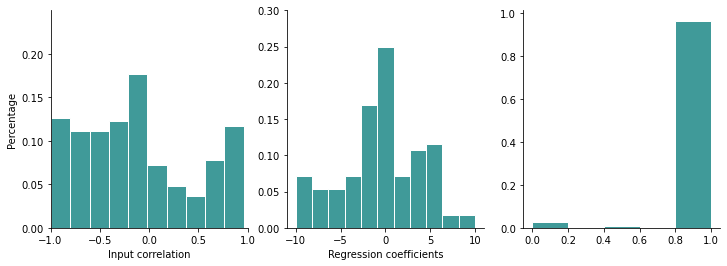

In [36]:

fig, axs = plt.subplots(1, 3,  figsize=(12,4))
sns.histplot(posterior_logprob[:, 0].exp().detach(), ax=axs[2], bins=5, stat='probability', edgecolor='w', linewidth=1, color='#007977')
sns.histplot(np.array(all_corr), ax=axs[0], bins=10, stat='probability', edgecolor='w', linewidth=1, color='#007977')
sns.histplot(np.array(all_coef), ax=axs[1], bins=11, binrange=(-10, 10), stat='probability', edgecolor='w', linewidth=1, color='#007977')
#axs[2].set_ylim(0, 0.5)
axs[0].set_ylim(0, 0.25)
axs[1].set_ylim(0, 0.3)
axs[0].set_xlim(-1, 1)
axs[0].set_ylabel('Percentage')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
axs[0].set_xlabel('Input correlation')
axs[1].set_xlabel('Regression coefficients')
axs[2].set_xlabel('Linearity')
axs[2].set_xlabel('')
axs[0].set_yticks(np.arange(0, 0.25, 0.05))
axs[1].set_yticks(np.arange(0, 0.35, 0.05))
#fig.set_size_inches(12, 4)
#plt.tight_layout()
sns.despine()
#plt.savefig('gpt.png', bbox_inches='tight')
plt.show()

# Archive

## baseline model performance

In [47]:
data = pd.read_csv('data_tasks_7B.csv')
#data = pd.read_csv('data_tasks.csv')
num_tasks=10
performance = benchmark_baseline_models(num_tasks, data)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [48]:
performance

array([[0.54545455, 0.63636364],
       [0.8       , 0.8       ],
       [0.9       , 1.        ],
       [0.5       , 0.5       ],
       [0.8       , 0.8       ],
       [0.8       , 0.8       ],
       [0.6       , 1.        ],
       [0.57142857, 0.85714286],
       [0.66666667, 0.77777778],
       [0.5       , 0.5       ]])

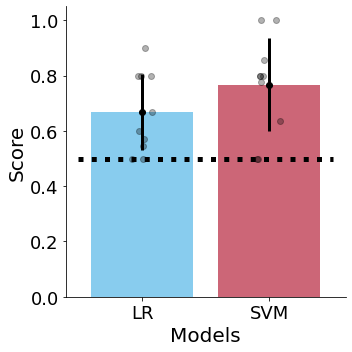

In [49]:
means = performance.mean(0)
std_errors = performance.std(0)#/np.sqrt(num_tasks-1)
conditions = ['LR', 'SVM']
colors = [COLORS['lr'], COLORS['svm']]
FIGSIZE=(5,5)

f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
## bar plot
ax.bar(np.arange(0,2), means, color=colors, label=conditions)
ax.errorbar(np.arange(0,2), means, yerr=std_errors, color='k', lw=3, fmt='o') #linestyle='solid')

## plot individual points
w = 0.2
ax.hlines(0.5, -0.5, 1.5, color='k', linestyles='dotted', lw=5)#, label='Random')
for i in range(2):
    # distribute scatter randomly across whole width of bar
    ax.scatter(i + np.random.random(performance.shape[0]) * w - w / 2, performance[:, i], color='k', alpha=.3, zorder=3)

## formatting    
# ax.set_ylim(ymin=0., ymax=1.)
plt.xticks(np.arange(0,2))
plt.yticks(fontsize=FONTSIZE-2)
ax.set_xlabel('Models', fontsize=FONTSIZE)
ax.set_ylabel(f'Score', fontsize=FONTSIZE)#$a_{trials}$
ax.set_xticklabels(conditions, fontsize=FONTSIZE-2)#['', '']
sns.despine()
f.tight_layout()
plt.show()

## binary classifation

In [26]:
data = pd.read_csv('data_tasks.csv')

In [27]:
performance

array([[0.6, 1. ],
       [0.7, 0.7],
       [0.6, 0.7],
       [0.6, 0.7],
       [0.6, 0.9],
       [0.9, 1. ],
       [0.8, 0.7],
       [0.6, 0.6],
       [1. , 1. ],
       [0.6, 0.7]])

In [40]:
task_id=8
X = np.vstack([data[data.TaskID==task_id].Input1, data[data.TaskID==task_id].Input2]).T
y = data[data.TaskID==task_id].Target

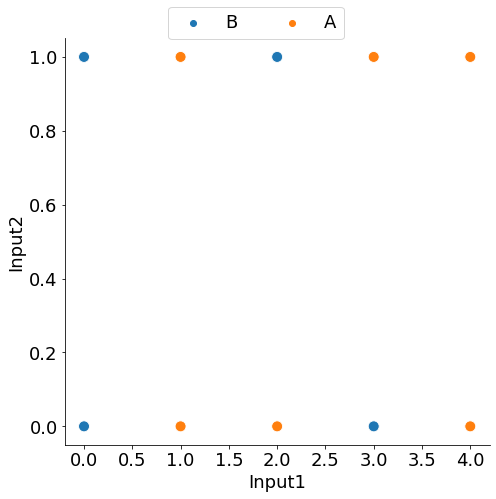

In [41]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
sns.scatterplot(x=data[data.TaskID==task_id]['Input1'], y=data[data.TaskID==task_id]['Input2'], hue=data[data.TaskID==task_id]['Target'],s=120)

plt.legend(fontsize=FONTSIZE-2,  loc="upper center", bbox_to_anchor=(.45, 1.1), ncol=2, frameon=True)
#plt.legend(loc='lower left', fontsize=FONTSIZE, frameon=True)
ax.set_xlabel('Input1', fontsize=FONTSIZE-2)
ax.set_ylabel('Input2', fontsize=FONTSIZE-2) #$a_{name_trials}$
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

In [32]:
lr = LogisticRegressionModel(X, y)

In [33]:
lr.predict(X)

array(['A', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'A'], dtype=object)

In [34]:
lr.score(X, y)

0.6

## visualize tasks

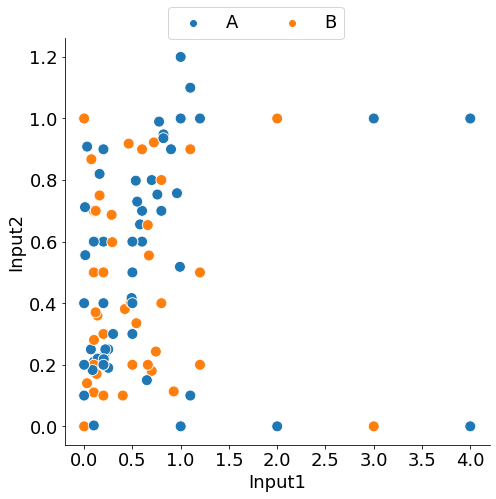

In [3]:
data = pd.read_csv('data_tasks.csv')
FONTSIZE=20
f, ax = plt.subplots(1, 1, figsize=(7,7))
sns.scatterplot(x=data['Input1'], y=data['Input2'], hue=data['Target'],s=120)

plt.legend(fontsize=FONTSIZE-2,  loc="upper center", bbox_to_anchor=(.45, 1.1), ncol=2, frameon=True)
#plt.legend(loc='lower left', fontsize=FONTSIZE, frameon=True)
ax.set_xlabel('Input1', fontsize=FONTSIZE-2)
ax.set_ylabel('Input2', fontsize=FONTSIZE-2) #$a_{name_trials}$
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

## visualize a task

In [4]:
task_id=4
data = pd.read_csv('data_tasks.csv')

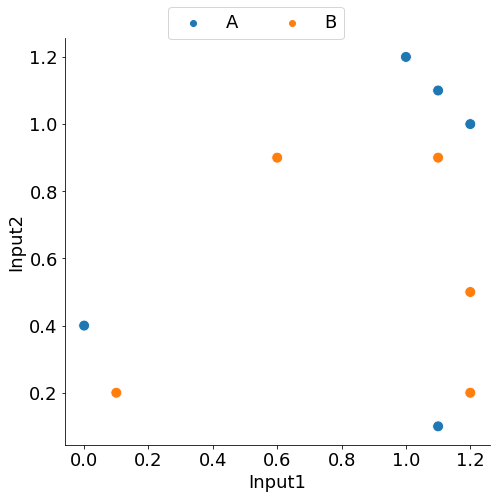

In [5]:
FONTSIZE=20
f, ax = plt.subplots(1, 1, figsize=(7,7))
sns.scatterplot(x=data[data.TaskID==task_id]['Input1'], y=data[data.TaskID==task_id]['Input2'], hue=data[data.TaskID==task_id]['Target'],s=120)

plt.legend(fontsize=FONTSIZE-2,  loc="upper center", bbox_to_anchor=(.45, 1.1), ncol=2, frameon=True)
#plt.legend(loc='lower left', fontsize=FONTSIZE, frameon=True)
ax.set_xlabel('Input1', fontsize=FONTSIZE-2)
ax.set_ylabel('Input2', fontsize=FONTSIZE-2) #$a_{name_trials}$
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

## example 2

In [2]:
data = pd.read_csv('data.csv')

In [4]:
data

,Input1,Input2,Target
0,0.23,0.89,A
1,0.21,0.15,A
2,0.66,0.97,A
3,0.79,0.40,B
4,0.48,0.87,B
5,0.64,0.69,B
6,0.04,0.35,B


<AxesSubplot:xlabel='Input1', ylabel='Input2'>

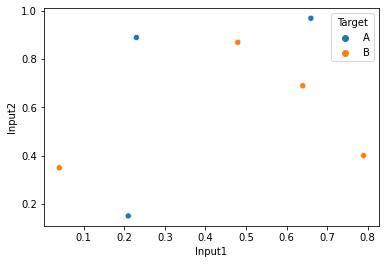

In [6]:
sns.scatterplot(x=data['Input1'], y=data['Input2'], hue=data['Target'])

## example 1

In [11]:
data = pd.read_csv('data.csv')
Bs = data[['B1', 'B2']]
As = data[['A1', 'A1']]

<AxesSubplot:xlabel='B1', ylabel='B2'>

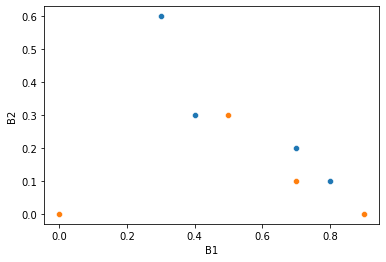

In [19]:
sns.scatterplot(x=data['B1'], y=data['B2'])
sns.scatterplot(x=data['A1'], y=data['A2'])